In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('howpop_train.csv')
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [3]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,
    inplace=True,
)


In [4]:
df["published"] = pd.to_datetime(df.published, yearfirst=True)

In [5]:
df["year"] = [d.year for d in df.published] 
df["month"] = [d.month for d in df.published] 
df["dayofweek"] = [d.isoweekday() for d in df.published] 
df["hour"] = [d.hour for d in df.published]

### 5. Постройте визуализацию и покажите в каком месяце (и какого года) было больше всего публикаций. 

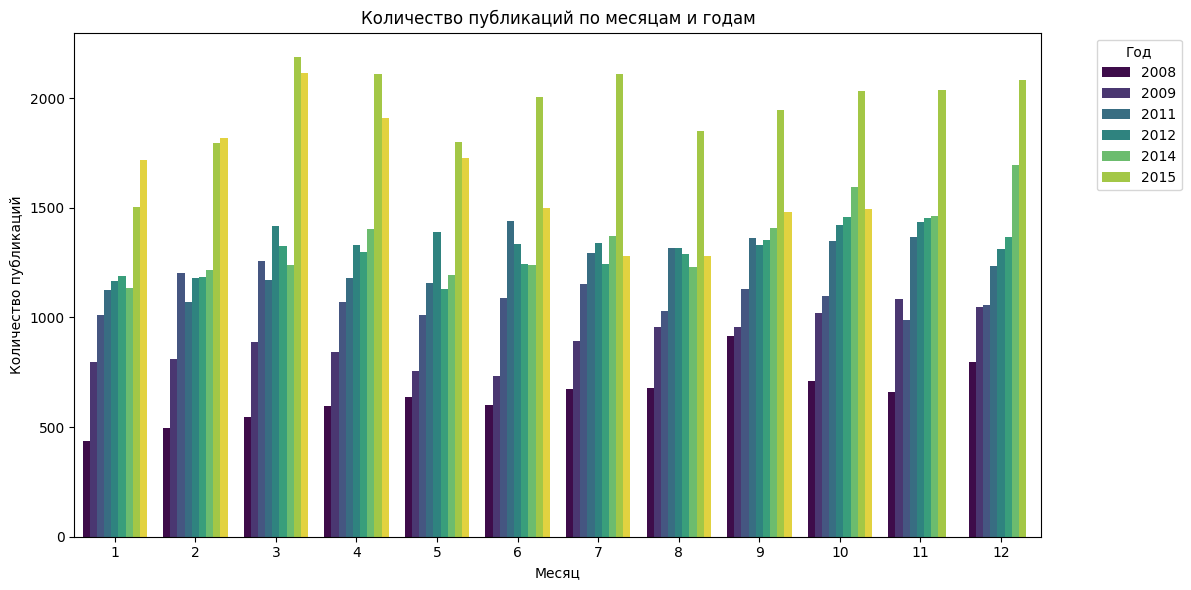

In [10]:
monthly_posts = df.groupby(['year', 'month']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_posts,
    x='month',
    y='count',
    hue='year',
    palette='viridis'
)
plt.title('Количество публикаций по месяцам и годам')
plt.xlabel('Месяц')
plt.ylabel('Количество публикаций')
plt.legend(title='Год', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

В марте 2015 года было больше всего публикаций.

### 6. Постройте график зависимости числа публикаций от дня недели, используя параметр hue.

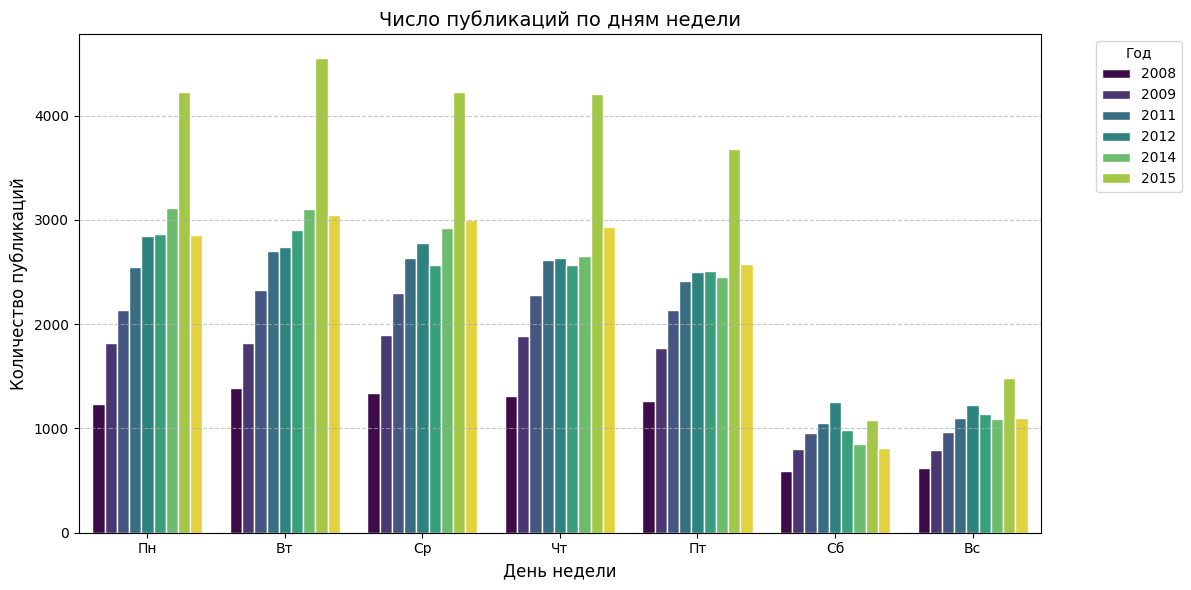

In [13]:
weekday_posts = df.groupby(['year', 'dayofweek']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=weekday_posts,
    x='dayofweek',
    y='count',
    hue='year',
    palette='viridis',
    edgecolor='white'
)

plt.title('Число публикаций по дням недели', fontsize=14)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Количество публикаций', fontsize=12)

weekday_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
plt.xticks(ticks=range(7), labels=weekday_names)

plt.legend(title='Год', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 7. Проведите визуальный анализ и отметьте верные утверждения про данный датасет.

C:\Users\levko\AppData\Local\Temp\ipykernel_9596\1894878868.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


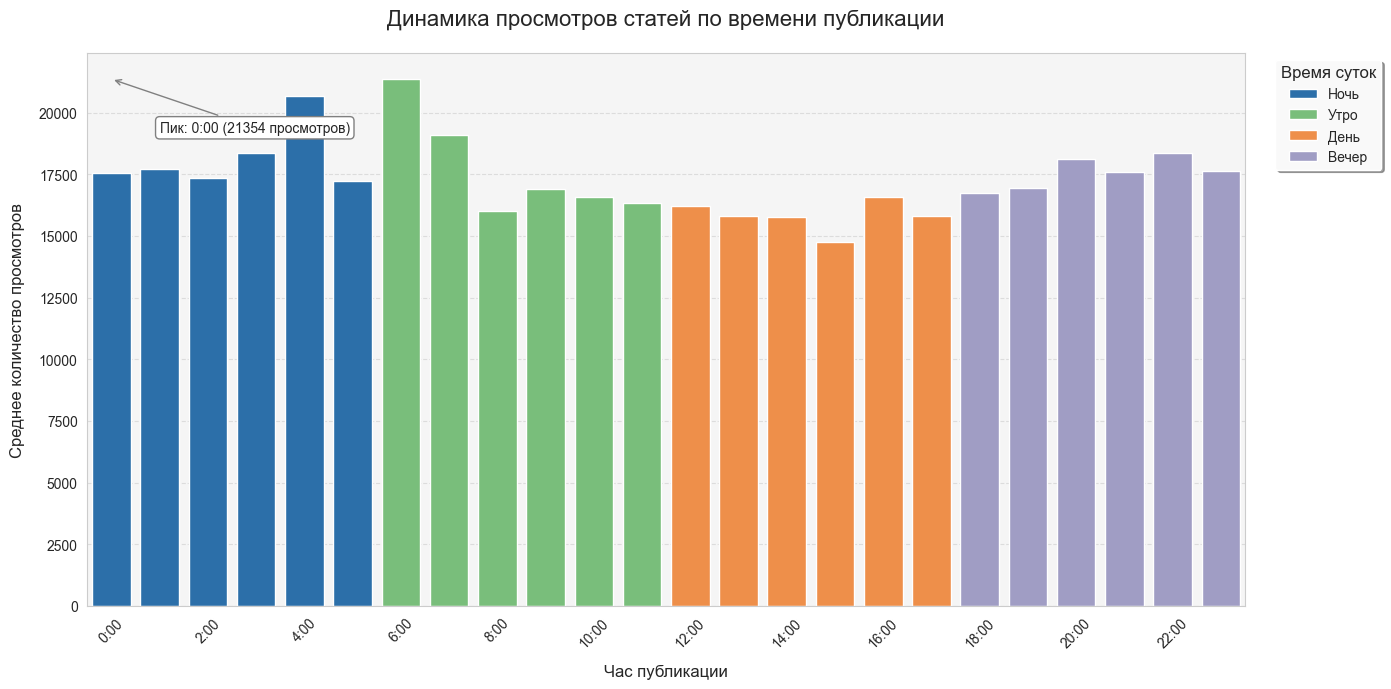

In [24]:
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df.dropna(subset=['views'], inplace=True)

time_bins = [0, 6, 12, 18, 24]
time_labels = ['Ночь', 'Утро', 'День', 'Вечер']
df['time_of_day'] = pd.cut(df['hour'], bins=time_bins, labels=time_labels, right=False, ordered=False)

palette = {
    'Ночь': sns.color_palette("Blues", 3)[2],
    'Утро': sns.color_palette("Greens", 3)[1],
    'День': sns.color_palette("Oranges", 3)[1],
    'Вечер': sns.color_palette("Purples", 3)[1]
}

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid", {'grid.linestyle': ':'})
ax = sns.barplot(
    x='hour',
    y='views',
    hue='time_of_day',
    data=df,
    estimator='mean',
    ci=None,
    palette=palette,
    saturation=0.85,
    dodge=False
)

plt.title('Динамика просмотров статей по времени публикации', fontsize=16, pad=20)
plt.xlabel('Час публикации', fontsize=12, labelpad=10)
plt.ylabel('Среднее количество просмотров', fontsize=12, labelpad=10)

ax.set_xticks(range(0, 24, 2))
ax.set_xticklabels([f'{h}:00' for h in range(0, 24, 2)], rotation=45)

legend = plt.legend(
    title='Время суток',
    frameon=True,
    shadow=True,
    edgecolor='white',
    bbox_to_anchor=(1.02, 1),
    title_fontsize=12
)
legend.get_frame().set_facecolor('#f9f9f9')

ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.xaxis.grid(False)

max_hour = df.loc[df.groupby('hour')['views'].idxmax()]['hour'].values[0]
max_views = df.groupby('hour')['views'].mean().max()
ax.annotate(f'Пик: {max_hour}:00 ({max_views:.0f} просмотров)',
            xy=(max_hour, max_views),
            xytext=(max_hour+1, max_views*0.9),
            arrowprops=dict(arrowstyle='->', color='gray'),
            bbox=dict(boxstyle='round', fc='white', ec='gray'))

ax.set_facecolor('#f5f5f5')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

C:\Users\levko\AppData\Local\Temp\ipykernel_9596\1111634593.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\levko\AppData\Local\Temp\ipykernel_9596\1111634593.py:25: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  ax = sns.barplot(


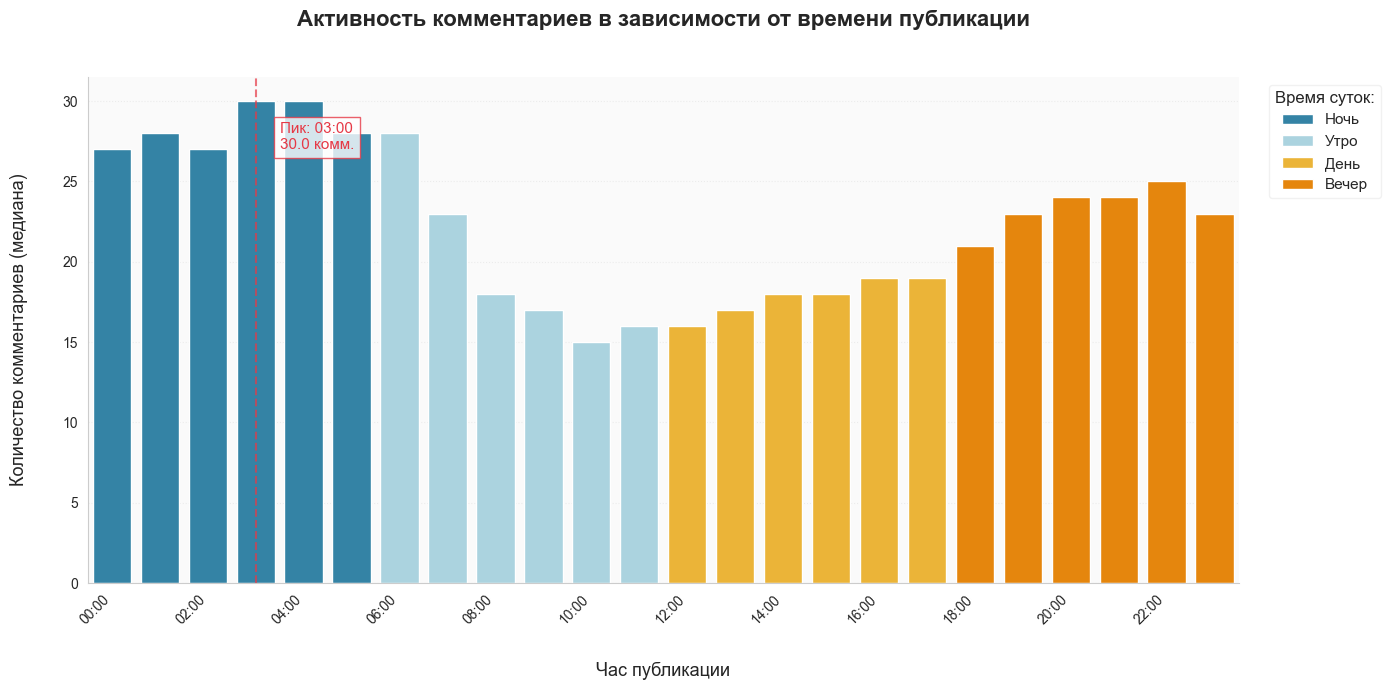

In [26]:
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')
df.dropna(subset=['comments'], inplace=True)

time_periods = [
    (0, 5, 'Ночь'),
    (6, 11, 'Утро'), 
    (12, 17, 'День'),
    (18, 23, 'Вечер')
]

df['time_of_day'] = 'День'
for start, end, label in time_periods:
    df.loc[df['hour'].between(start, end, inclusive='both'), 'time_of_day'] = label

palette = {
    'Ночь': '#2e86ab',
    'Утро': '#a8d5e2', 
    'День': '#f5b82e',
    'Вечер': '#f18701' 
}

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid", {'axes.edgecolor': '.8', 'grid.color': '.9'})

ax = sns.barplot(
    x='hour',
    y='comments',
    hue='time_of_day',
    data=df,
    estimator='median', 
    ci=None,
    palette=palette,
    saturation=0.9,
    dodge=False,
    errwidth=1
)

plt.title('Активность комментариев в зависимости от времени публикации\n', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('\nЧас публикации', fontsize=13, labelpad=10)
plt.ylabel('Количество комментариев (медиана)\n', fontsize=13, labelpad=10)

ax.set_xticks(range(0, 24, 2))
ax.set_xticklabels([f'{h:02d}:00' for h in range(0, 24, 2)], rotation=45, ha='right')

legend = plt.legend(
    title='Время суток:',
    title_fontsize=12,
    fontsize=11,
    frameon=True,
    framealpha=0.9,
    edgecolor='#f0f0f0',
    facecolor='white',
    bbox_to_anchor=(1.02, 1)
)

ax.yaxis.grid(True, linestyle=':', alpha=0.7)
ax.xaxis.grid(False)

max_hour = df.groupby('hour')['comments'].median().idxmax()
max_value = df.groupby('hour')['comments'].median().max()
ax.axvline(x=max_hour, color='#e63946', linestyle='--', alpha=0.7, linewidth=1.5)
ax.text(x=max_hour+0.5, y=max_value*0.9, 
        s=f'Пик: {max_hour:02d}:00\n{max_value:.1f} комм.',
        color='#e63946',
        fontsize=11,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='#e63946'))

ax.set_facecolor('#fafafa')
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

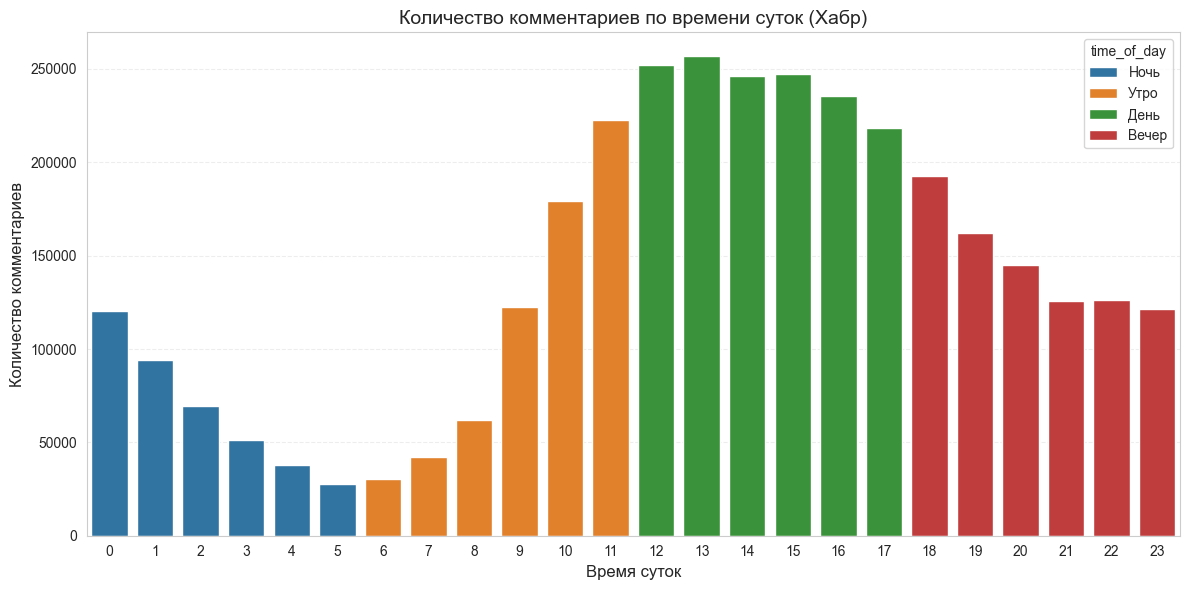

In [32]:
df['published'] = pd.to_datetime(df['published'])

df['hour'] = df['published'].dt.hour
df['time_of_day'] = 'День'
df.loc[df['hour'].between(6, 11, inclusive='both'), 'time_of_day'] = 'Утро'
df.loc[df['hour'].between(12, 17, inclusive='both'), 'time_of_day'] = 'День'
df.loc[df['hour'].between(18, 23, inclusive='both'), 'time_of_day'] = 'Вечер'
df.loc[df['hour'].between(0, 5, inclusive='both'), 'time_of_day'] = 'Ночь'

comments_by_time_of_day = df[df['domain'] == 'habrahabr.ru'].groupby(["hour", "time_of_day"])["comments"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='hour',
    y='comments',
    hue='time_of_day',
    data=comments_by_time_of_day,
)
plt.title('Количество комментариев по времени суток (Хабр)', fontsize=14)
plt.xlabel('Время суток', fontsize=12)
plt.ylabel('Количество комментариев', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

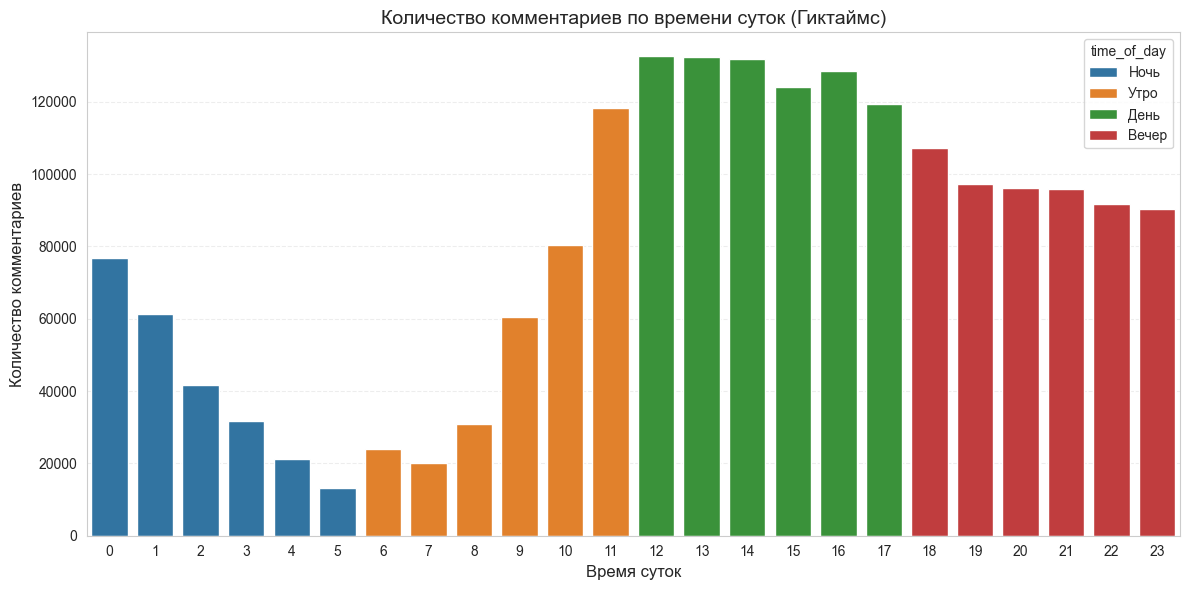

In [33]:
df['published'] = pd.to_datetime(df['published'])

df['hour'] = df['published'].dt.hour
df['time_of_day'] = 'День'
df.loc[df['hour'].between(6, 11, inclusive='both'), 'time_of_day'] = 'Утро'
df.loc[df['hour'].between(12, 17, inclusive='both'), 'time_of_day'] = 'День'
df.loc[df['hour'].between(18, 23, inclusive='both'), 'time_of_day'] = 'Вечер'
df.loc[df['hour'].between(0, 5, inclusive='both'), 'time_of_day'] = 'Ночь'

comments_by_time_of_day = df[df['domain'] == 'geektimes.ru'].groupby(["hour", "time_of_day"])["comments"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='hour',
    y='comments',
    hue='time_of_day',
    data=comments_by_time_of_day,
)
plt.title('Количество комментариев по времени суток (Гиктаймс)', fontsize=14)
plt.xlabel('Время суток', fontsize=12)
plt.ylabel('Количество комментариев', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

Больше всего просмотров набирают статьи, опубликованные в 12 часов дня - НЕВЕРНО <br>
У опубликованных в 10 утра постов больше всего комментариев - НЕВЕРНО <br>
Больше всего просмотров набирают статьи, опубликованные в 6 часов утра - ВЕРНО <br>
Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера - НЕВЕРНО <br>
На хабре дневные статьи комментируют чаще, чем вечерние - ВЕРНО <br>

### 8. Проведите визуальный анализ и определите кого из топ-20 авторов чаще всего минусуют? 

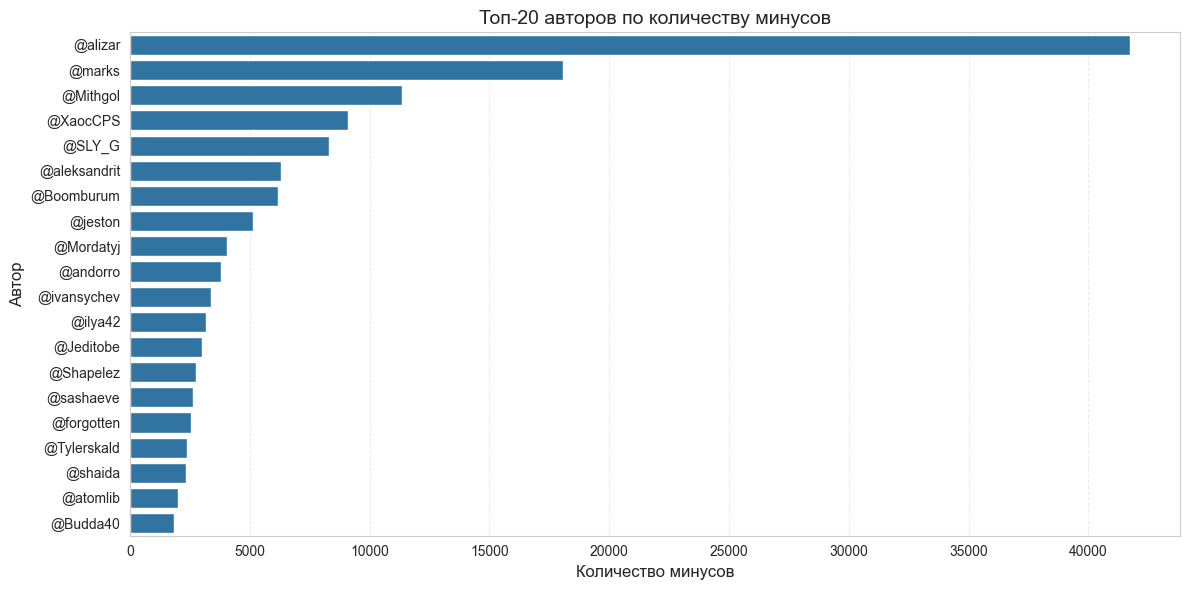

In [34]:
author_votes = df.groupby('author')['votes_minus'].sum().reset_index()

top_authors = author_votes.sort_values(by='votes_minus', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='votes_minus',
    y='author',
    data=top_authors,
)
plt.title('Топ-20 авторов по количеству минусов', fontsize=14)
plt.xlabel('Количество минусов', fontsize=12)
plt.ylabel('Автор', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Больше всего минусуют автора с никнеймом alizar

### 9. Сравните субботы и понедельники. Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

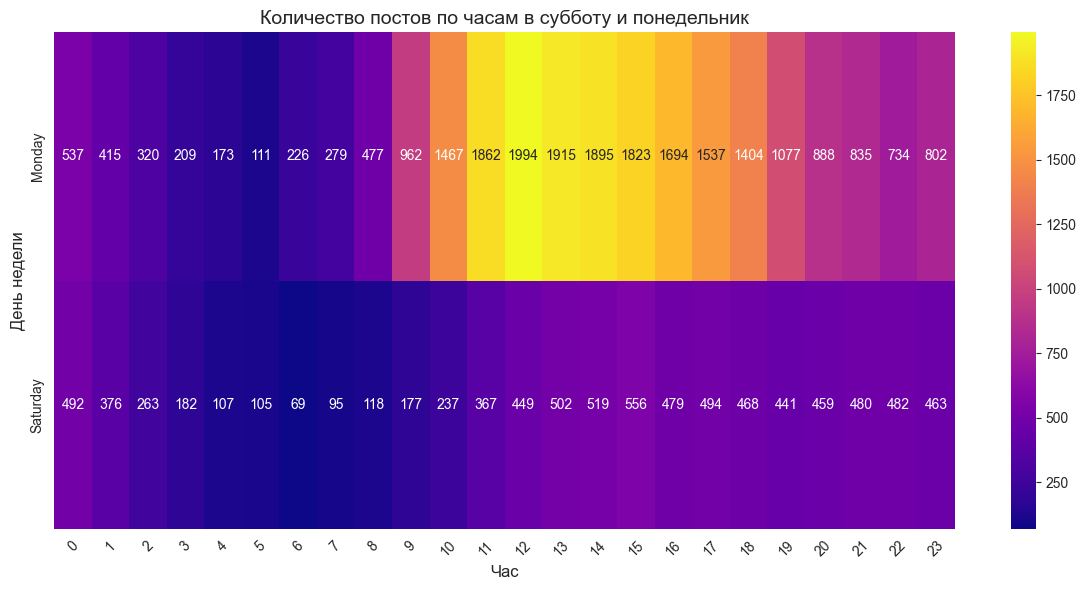

In [35]:
df['published'] = pd.to_datetime(df['published'])

df['day_of_week'] = df['published'].dt.day_name()
df['hour'] = df['published'].dt.hour

filtered_df = df[df['day_of_week'].isin(['Saturday', 'Monday'])]

posts_by_hour = filtered_df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(posts_by_hour, cmap='plasma', annot=True, fmt='d')
plt.title('Количество постов по часам в субботу и понедельник', fontsize=14)
plt.xlabel('Час', fontsize=12)
plt.ylabel('День недели', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

Предположение что по субботам авторы пишут в основном днём - ВЕРНО <br>
Предположение что по понедельникам авторы пишут в основном вечером - НЕВЕРНО